# ***Importing Dataset***

In [1]:
#!gdown --id 1QvXnm6_QKuL64KMLwmbtMSzezzKfbZft

In [2]:
#!unzip archive.zip

# *Visualizing Some Images From The Dataset*

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

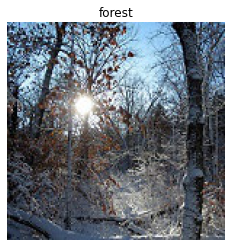

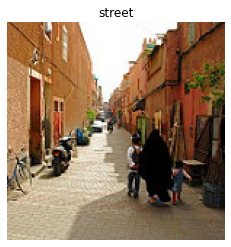

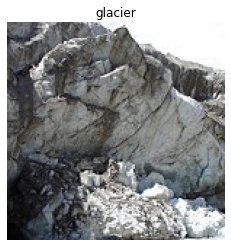

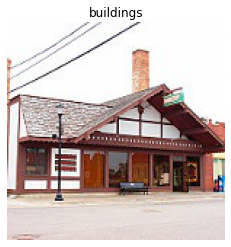

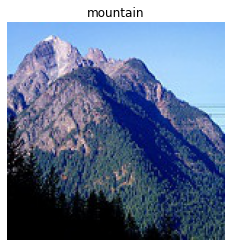

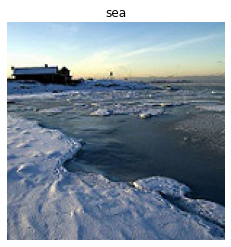

In [4]:
#Viewing 1 image from each class
classes=os.listdir('/content/seg_train/seg_train')
for i in range(len(classes)):
  images_of_a_class=os.listdir('/content/seg_train/seg_train/'+classes[i])
  for j in range(len(images_of_a_class)):
    image=plt.imread('/content/seg_train/seg_train/'+classes[i]+'/'+images_of_a_class[j])
    image=image/255.0
    plt.imshow(image)
    plt.title(classes[i])
    plt.axis('off')
    plt.show()
    break

# ***InceptionV3***

In [10]:
import pandas as pd
from tensorflow.keras.optimizers import RMSprop,Adam
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import *
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras import Model
from os import getcwd
from keras.layers import Dense, Activation, BatchNormalization
import tensorflow as tf
from keras.layers import *
import shutil
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator

In [11]:
from keras.applications.inception_v3 import InceptionV3,preprocess_input
model=InceptionV3(weights='imagenet',input_shape=(224,224,3),include_top=False)

av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(2048,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(1024,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(512,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
inception=Model(inputs=model.input,outputs=fc4)
inception.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d_94 (Conv2D)              (None, 111, 111, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo (None, 111, 111, 32) 96          conv2d_94[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      (None, 111, 111, 32) 0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [12]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [13]:
for i in range(len(inception.layers)):
  print(i)
  print(inception.layers[i])
  if(i<203):
    inception.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
inception.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
inception_v3=inception.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 121s 521ms/step - loss: 1.7426 - accuracy: 0.3484 - val_loss: 0.5950 - val_accuracy: 0.8227
Epoch 2/20
220/220 [==============================] - 111s 507ms/step - loss: 0.3429 - accuracy: 0.8978 - val_loss: 0.4111 - val_accuracy: 0.9097
Epoch 3/20
220/220 [==============================] - 111s 507ms/step - loss: 0.2411 - accuracy: 0.9316 - val_loss: 0.2938 - val_accuracy: 0.9137
Epoch 4/20
220/220 [==============================] - 111s 505ms/step - loss: 0.2074 - accuracy: 0.9403 - val_loss: 0.2435 - val_accuracy: 0.9280
Epoch 5/20
220/220 [==============================] - 111s 506ms/step - loss: 0.1611 - accuracy: 0.9532 - val_loss: 16.4252 - val_accuracy: 0.4233
Epoch 6/20
220/220 [==============================] - 111s 505ms/step - loss: 0.2077 - accuracy: 0.9412 - val_loss: 0.2926 - val_accuracy: 0.9237
Epoch 7/20
220/220 [==============================] - 113s 512ms/step - loss: 0.1506 - accuracy: 0.9585 - val_loss: 0.3950 

In [15]:
inception.save('inception.h5')

# ***VGG19***

In [16]:
from keras.applications.vgg19 import VGG19,preprocess_input
model=VGG19(weights='imagenet',input_shape=(224,224,3),include_top=False)
model.summary()

80142336/80134624 [==============================] - 1s 0us/step
Model: "vgg19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

In [17]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(512,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(256,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(128,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
vgg19=Model(inputs=model.input,outputs=fc4)
vgg19.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [18]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [19]:
for i in range(len(vgg19.layers)):
  print(i)
  print(vgg19.layers[i])
  if(i<12):
    vgg19.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


In [20]:
vgg19.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
VGG19=vgg19.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 245s 1s/step - loss: 10.6646 - accuracy: 0.1705 - val_loss: 1.7904 - val_accuracy: 0.1750
Epoch 2/20
220/220 [==============================] - 206s 937ms/step - loss: 1.7915 - accuracy: 0.1770 - val_loss: 1.7903 - val_accuracy: 0.1750
Epoch 3/20
220/220 [==============================] - 208s 947ms/step - loss: 1.7915 - accuracy: 0.1789 - val_loss: 1.7902 - val_accuracy: 0.1750
Epoch 4/20
220/220 [==============================] - 208s 947ms/step - loss: 1.7914 - accuracy: 0.1720 - val_loss: 1.7901 - val_accuracy: 0.1750
Epoch 5/20
220/220 [==============================] - 209s 948ms/step - loss: 1.7917 - accuracy: 0.1746 - val_loss: 1.7901 - val_accuracy: 0.1750
Epoch 6/20
220/220 [==============================] - 208s 945ms/step - loss: 1.7911 - accuracy: 0.1761 - val_loss: 1.7902 - val_accuracy: 0.1750
Epoch 7/20
220/220 [==============================] - 208s 946ms/step - loss: 1.7909 - accuracy: 0.1766 - val_loss: 1.7903 - v

In [21]:
vgg19.save('vgg19.h5')

## ***Xception***

In [22]:
from keras.applications.xception import Xception,preprocess_input
model=Xception(weights='imagenet',input_shape=(224,224,3),include_top=False)
model.summary()


83689472/83683744 [==============================] - 3s 0us/step
Model: "xception"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
__________________________

In [23]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(2048,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(1024,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(512,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
xception=Model(inputs=model.input,outputs=fc4)
xception.summary()


Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 111, 111, 32) 864         input_4[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 111, 111, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 111, 111, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [24]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [25]:
for i in range(len(xception.layers)):
  print(i)
  print(xception.layers[i])
  if(i<103):
    xception.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139


In [26]:
xception.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
Xception=xception.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 219s 968ms/step - loss: 1.3135 - accuracy: 0.4117 - val_loss: 0.2926 - val_accuracy: 0.9187
Epoch 2/20
220/220 [==============================] - 208s 945ms/step - loss: 0.2895 - accuracy: 0.9151 - val_loss: 0.2418 - val_accuracy: 0.9273
Epoch 3/20
220/220 [==============================] - 208s 946ms/step - loss: 0.2184 - accuracy: 0.9302 - val_loss: 0.2529 - val_accuracy: 0.9243
Epoch 4/20
220/220 [==============================] - 208s 946ms/step - loss: 0.1682 - accuracy: 0.9522 - val_loss: 0.2595 - val_accuracy: 0.9093
Epoch 5/20
220/220 [==============================] - 208s 947ms/step - loss: 0.1893 - accuracy: 0.9479 - val_loss: 0.3626 - val_accuracy: 0.9157
Epoch 6/20
220/220 [==============================] - 208s 946ms/step - loss: 0.0942 - accuracy: 0.9701 - val_loss: 0.3243 - val_accuracy: 0.9283
Epoch 7/20
220/220 [==============================] - 208s 946ms/step - loss: 0.1150 - accuracy: 0.9700 - val_loss: 0.7223 -

In [27]:
xception.save('xception.h5')

## ***ResNet50***

In [28]:
from keras.applications.resnet import ResNet50,preprocess_input
model=ResNet50(weights='imagenet',input_shape=(224,224,3),include_top=False)
model.summary()


94773248/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
__________________________

In [29]:
av1=GlobalAveragePooling2D()(model.output)
fc1=Dense(2048,activation='relu')(av1)
d1=Dropout(0.25)(fc1)
fc2=Dense(1024,activation='relu')(d1)
d2=Dropout(0.25)(fc2)
fc3=Dense(512,activation='relu')(d2)
d3=Dropout(0.25)(fc3)
fc4=Dense(6,activation='softmax')(d3)
resnet50=Model(inputs=model.input,outputs=fc4)
resnet50.summary()


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
____________________________________________________________________________________________

In [30]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
                                
train_generator = train_gen.flow_from_directory(
    "/content/seg_train/seg_train/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_gen.flow_from_directory(
    "/content/seg_test/seg_test/",
    target_size = (224,224),
    batch_size = 64,
    class_mode = 'categorical'
)

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [31]:

for i in range(len(resnet50.layers)):
  print(i)
  print(resnet50.layers[i])
  if(i<98):
    resnet50.layers[i].trainable=False

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182


In [32]:
resnet50.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ResNet50=resnet50.fit(train_generator,validation_data=val_generator,epochs=20)

Epoch 1/20
220/220 [==============================] - 182s 796ms/step - loss: 2.1325 - accuracy: 0.4017 - val_loss: 0.8970 - val_accuracy: 0.7927
Epoch 2/20
220/220 [==============================] - 173s 785ms/step - loss: 0.3607 - accuracy: 0.8934 - val_loss: 0.2703 - val_accuracy: 0.9020
Epoch 3/20
220/220 [==============================] - 174s 791ms/step - loss: 0.2708 - accuracy: 0.9225 - val_loss: 0.2786 - val_accuracy: 0.9140
Epoch 4/20
220/220 [==============================] - 174s 791ms/step - loss: 0.2052 - accuracy: 0.9412 - val_loss: 0.2741 - val_accuracy: 0.9247
Epoch 5/20
220/220 [==============================] - 175s 793ms/step - loss: 0.1734 - accuracy: 0.9514 - val_loss: 0.2484 - val_accuracy: 0.9227
Epoch 6/20
220/220 [==============================] - 175s 794ms/step - loss: 0.1600 - accuracy: 0.9497 - val_loss: 0.2448 - val_accuracy: 0.9213
Epoch 7/20
220/220 [==============================] - 175s 793ms/step - loss: 0.1157 - accuracy: 0.9645 - val_loss: 0.3166 -

In [33]:
resnet50.save('resnet50.h5')

# **Visualization**

In [34]:
import pandas as pd
   
Xception_history = pd.DataFrame(Xception.history) 
VGG19_history= pd.DataFrame(VGG19.history)
InceptionV3_history = pd.DataFrame(inception_v3.history) 
ResNet50_history= pd.DataFrame(ResNet50.history) 

Xception_history.to_csv('Xception.csv')
VGG19_history.to_csv('VGG19.csv')
InceptionV3_history.to_csv('InceptionV3.csv')
ResNet50_history.to_csv('ResNet50.csv')

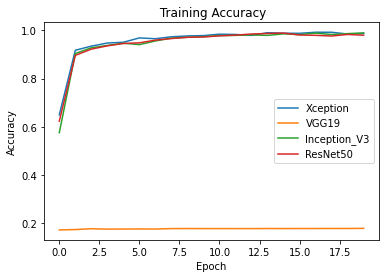

In [35]:
#Training Accuracy
plt.plot(Xception_history['accuracy'])
plt.plot(VGG19_history['accuracy'])
plt.plot(InceptionV3_history['accuracy'])
plt.plot(ResNet50_history['accuracy'])
plt.title(' Training Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG19','Inception_V3','ResNet50'], loc='best')
plt.show()

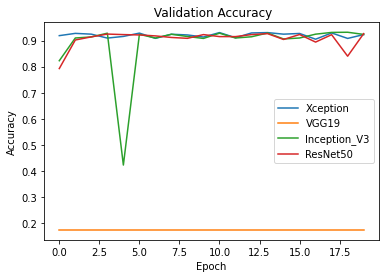

In [36]:
#Validation Accuracy
plt.plot(Xception_history['val_accuracy'])
plt.plot(VGG19_history['val_accuracy'])
plt.plot(InceptionV3_history['val_accuracy'])
plt.plot(ResNet50_history['val_accuracy'])
plt.title(' Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG19','Inception_V3','ResNet50'], loc='best')
plt.show()

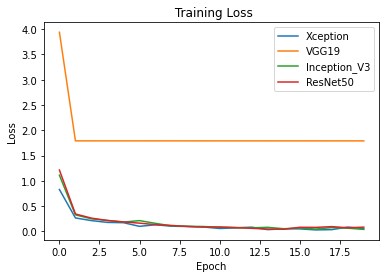

In [37]:
#Training Loss
plt.plot(Xception_history['loss'])
plt.plot(VGG19_history['loss'])
plt.plot(InceptionV3_history['loss'])
plt.plot(ResNet50_history['loss'])
plt.title(' Training Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG19','Inception_V3','ResNet50'], loc='best')
plt.show()

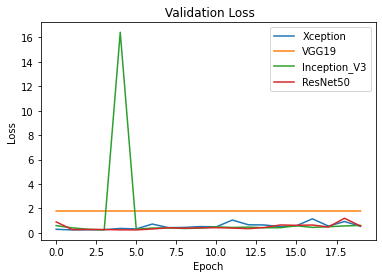

In [38]:
#Validation Loss
plt.plot(Xception_history['val_loss'])
plt.plot(VGG19_history['val_loss'])
plt.plot(InceptionV3_history['val_loss'])
plt.plot(ResNet50_history['val_loss'])
plt.title(' Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Xception', 'VGG19','Inception_V3','ResNet50'], loc='best')
plt.show()